In [ ]:
# Assignment

For this assignment you will calculate and plot the distribution of the path lengths of a graph. First we will generate the graphs:

In [3]:
import networkx as nx
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import deque

%matplotlib inline

#random_graph = nx.erdos_renyi_graph(10, 0.6)
random_graph = nx.erdos_renyi_graph(1200, 0.008)
print(nx.info(random_graph))

Name: gnp_random_graph(1200,0.008)
Type: Graph
Number of nodes: 1200
Number of edges: 5733
Average degree:   9.5550


## 1. Write shortest path algorithm

Let's write an algorithm that will calculate the shortest paths between all the nodes and then place the lengths of those shortest paths in a sequence (such as a list or array). 

The first task will be creating a function that calculate the shortest path lengths from a single node to everyone else, like the following:

In [6]:
def all_shortest_path_lengths_from(G, node):      
    """
    BSF implementation copied from MIT Open Courseware Lecture 13, Breadth-First Search (BSF): 
    https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/lecture-videos/lecture-13-breadth-first-search-bfs
    """
    
    level = {node: 0}
    parent = {node: None}
    i = 1
    frontier = [node]
    
    while frontier:
        next_frontier = []
        for u in frontier:
            for v in G[u]:
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    next_frontier.append(v)
        frontier = next_frontier
        i += 1
    
    return level

def all_shortest_path_lengths_from_deque(G, node):
    """
    BSF implementation adapted from Grokking algorithms, Adity Y. Bhargava. Manning Publications, 2016.
    Uses the deque collection object to store the search queue. 
    
    I added a for-loop to the original implementation in order to properly record the level of each 
    cluster of neighbors.    
    """
    
    search_queue = deque([node])    
    current = deque()
    searched = {node}
    
    level = {node: 0}
    parent = {node: None}
    i = 1
    
    while search_queue:                    
        current = deque()
        for neighbor in search_queue:                                
            for n in G[neighbor]:            
                if not n in searched:                
                    level[n] = i
                    parent[n] = neighbor      
                    current.append(n)                                         
                    searched.add(n)                                            
        search_queue = current            
        node = neighbor            
                        
        i += 1                   
                
    return level
    
    

In [37]:
p = all_shortest_path_lengths_from_deque(random_graph, 0)
print(p)

{0: 0, 1: 4, 2: 4, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 4, 9: 3, 10: 4, 11: 1, 12: 4, 13: 4, 14: 4, 15: 3, 16: 3, 17: 4, 18: 4, 19: 4, 20: 3, 21: 4, 22: 3, 23: 4, 24: 3, 25: 4, 26: 3, 27: 3, 28: 3, 29: 3, 30: 4, 31: 4, 32: 3, 33: 3, 34: 3, 35: 4, 36: 3, 37: 4, 38: 4, 39: 1, 40: 3, 41: 4, 42: 4, 43: 3, 44: 4, 45: 4, 46: 3, 47: 3, 48: 4, 49: 3, 50: 4, 51: 3, 52: 3, 53: 3, 54: 4, 55: 3, 56: 4, 57: 4, 58: 4, 59: 2, 60: 4, 61: 4, 62: 3, 63: 3, 64: 3, 65: 3, 66: 4, 67: 2, 68: 2, 69: 4, 70: 3, 71: 4, 72: 3, 73: 3, 74: 4, 75: 3, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 4, 82: 3, 83: 4, 84: 3, 85: 4, 86: 2, 87: 3, 88: 3, 89: 4, 90: 3, 91: 3, 92: 2, 93: 3, 94: 3, 95: 4, 96: 4, 97: 3, 98: 4, 99: 4, 100: 4, 101: 4, 102: 3, 103: 4, 104: 4, 105: 4, 106: 4, 107: 3, 108: 3, 109: 4, 110: 4, 111: 3, 112: 4, 113: 4, 114: 3, 115: 3, 116: 4, 117: 3, 118: 3, 119: 4, 120: 3, 121: 3, 122: 3, 123: 2, 124: 3, 125: 3, 126: 2, 127: 3, 128: 4, 129: 3, 130: 3, 131: 4, 132: 2, 133: 4, 134: 4, 135: 4, 136: 3, 137: 2, 138: 

You need a queue that stores the nodes to visit at the next hop. You pull one from this queue, say `i`, assign the current distance, and then go through each neighbor of `i` and see whether we have seen the node before or not. If we have seen it, we can ignore it (we already know the shortest distance). If not, we should put this node to the queue. You may want to have two queues (or lists or sets) for the "current" level and the "next" level of the search. 

After getting the single-source shortest path algorithm right, you can apply it to every node in the graph and obtain the list of shortest path length values. 

In [78]:
def all_shortest_path_lengths(G):    
    """Creates a list of path lengths starting from each node in the graph."""
    
    paths = deque()
    nodes = deque()
    processed = deque()
    
    for node in G:                
        nodes = all_shortest_path_lengths_from_deque(G, node)
        processed.append(node)              
        for k, v in nodes.items():
            if not k in processed:
                paths.append(v)                         
    return paths

Apply your algorithm to the ```random_graph```.

In [80]:
paths = all_shortest_path_lengths(random_graph)
print(len(paths))

719400


## 2. Visualizing the results
Now that you have a list of the shortest paths for the graph, make a histogram for it. This can be done with [matplotlibs histogram function](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

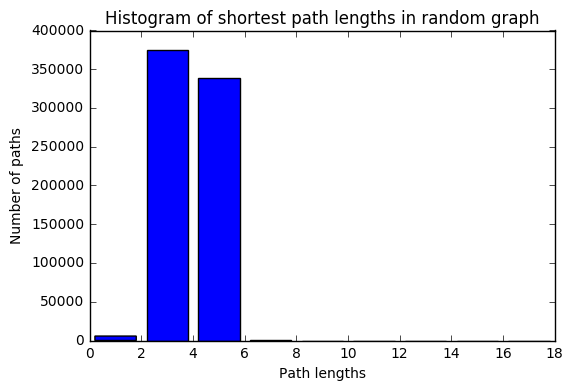

In [81]:
data = paths #all_shortest_path_lengths(random_graph)
bins = list(range(0, 20, 2))

plt.title("Histogram of shortest path lengths in random graph")
plt.xlabel("Path lengths")
plt.ylabel("Number of paths")
plt.hist(data, bins, histtype="bar", rwidth=0.8)
plt.show()

### Name your notebook: shortest_lastname_firstname.ipynb and submit to Canvas